In [1]:
import numpy as np
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.environ['rapp'])
sys.path.append(os.environ['raco'])
sys.path.append(os.environ['rapl'] + '/slice')
sys.path.append(os.environ['rapl'] + '/azav')

from azav_util import plot_azav
from slice_util import plot_moll, get_slice, mollweide_transform
from common import *
from varprops import *
from constants import *
labelsize = 8

sys.path.append(os.environ['rapl'] + '/timetrace')
from cla_util import *
from plotcommon import *
from timey_util import *

In [2]:
dirname = '/nobackup/lmatilsk/case_M/'
#dirname = '/altair/loma3853/public/case_M/'
datadir = dirname + 'data/'

In [3]:
# grid stuff
gi = get_grid_info(dirname)
rr = gi['rr']
nr = len(rr)
nphi = gi['nphi']
tw = gi['tw']
tw_2d = gi['tw_2d']
nt = len(tw)
tt_lat = gi['tt_lat']
print('nr =', nr)
print('nt =', nt)
print('nphi =', nphi)

nr = 192
nt = 384
nphi = 768


In [4]:
# pick desired time for shell slice
t_des  = 4422
#t_des = 50000 # just do the last one
time_unit = compute_Prot(dirname)

# Get Shell_Slice
file_list, int_file_list, nfiles = get_file_lists_all(dirname + 'Shell_Slices/')

di_trans = translate_times(t_des, dirname, translate_from='prot')
iter_des = di_trans['val_iter']
iiter = np.argmin(np.abs(int_file_list - iter_des))
print ("reading " + dirname + 'Shell_Slices/' + file_list[iiter])
a = Shell_Slices(dirname + 'Shell_Slices/' + file_list[iiter], '')
tval = a.time[0]/time_unit
iterval = a.iters[0]

print ("t = %.1f" %tval)
print ("iter = %i" %iterval)

reading /nobackup/lmatilsk/case_M/Shell_Slices/13650000
t = 4421.6
iter = 13650000


In [5]:
# read shell slices
bp = get_slice(a, 'bp')
bt = get_slice(a, 'bt')
br = get_slice(a, 'br')

In [6]:
# pick a depth
# get mer time_rad for m = 1
qval = 803
thefile = get_widest_range_file(datadir + 'mertimerad_mval001/', 'mertimerad_b')
print ('reading ' + thefile)
di = get_dict(thefile)
vals = di['vals']
print ("shape (vals) =", np.shape(vals))
times = di['times']
prot = 2*np.pi/8.61e-6
times /= prot

reading /nobackup/lmatilsk/case_M/data/mertimerad_mval001/mertimerad_b-07802500_50220000.pkl
shape (vals) = (16968, 13, 192, 3)


In [7]:
print ("rvals = ", a.radius/rsun)

rvals =  [0.93453501 0.91902629 0.88888912 0.86309906 0.83548624 0.80227695
 0.77648689 0.74634972 0.730841   0.71870059 0.70707956 0.6906394
 0.66109085 0.63447754 0.6034544  0.57752866 0.5476774  0.51833426
 0.50226305]


In [8]:
latvals = di['samplevals']
print ("latvals =", latvals)

latvals = [-84.96694044 -75.13635844 -60.15596238 -45.17550392 -30.19503033
 -15.21455119  -0.23407002  15.21455119  30.19503033  45.17550392
  60.15596238  75.13635844  84.96694044]


In [9]:
# choose a latitude
lat0 = 15.
ilat0 = np.argmin(np.abs(latvals - lat0))
lat0 = latvals[ilat0]

# get the same thing associated with the full tt_lat grad
ilat0_grid = np.argmin(np.abs(tt_lat - lat0))
lat0_grid = tt_lat[ilat0_grid]

print ("sample lat =", lat0)
print ("grid   lat =", lat0_grid)

sample lat = 15.21455119420977
grid   lat = 15.21455119420977


In [10]:
# get m = 1 B field at lat = 15.
bp_m1 = vals[:, ilat0, :, 2]

br_m1 = vals[:, ilat0, :, 0]
bt_m1 = vals[:, ilat0, :, 1]

print ("shape(bp_m1) =", np.shape(bp_m1))

shape(bp_m1) = (16968, 192)


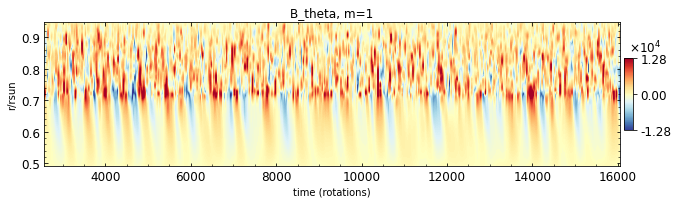

In [11]:
# let's plot the m = 1 B_theta, field
fig, axs, fpar = make_figure(sub_width_inches=8, sub_height_inches=2, margin_right_inches=3/4,\
                            margin_top_inches=1/4)
ax = axs[0, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('r/rsun')
ax.set_title('B_theta, m=1')
ntot = 500
t_thin = thin_data(times, ntot)
field = thin_data(np.real(bt_m1), ntot)
plot_timey(field, t_thin, rr/rsun, fig, ax)

In [12]:
# hmmm... it might be good to have a better field in the convection zone...

In [13]:
# try same thing with timerad from Shell_Slices
# get m time_rad for m = 1
thefile = get_widest_range_file(datadir + 'mtimerad_mval001/', 'mtimerad_b')
print ('reading ' + thefile)
di = get_dict(thefile)
vals = di['vals']
print ("shape (vals) =", np.shape(vals))
times_ss = di['times']/prot

# get m = 1 B field at lat = 15.
bp_m1_ss = vals[:, ilat0, :, 2]
br_m1_ss = vals[:, ilat0, :, 0]
bt_m1_ss = vals[:, ilat0, :, 1]

print ("shape(bp_m1_ss) =", np.shape(bp_m1_ss))
print ("len(times) =", len(times))
print ("len(times_ss) =", len(times_ss))
print ("len(latvals) =", len(latvals))
print ("len(a.radius) =", len(a.radius))

reading /nobackup/lmatilsk/case_M/data/mtimerad_mval001/mtimerad_b-07810000_50220000.pkl
shape (vals) = (4242, 13, 19, 3)
shape(bp_m1_ss) = (4242, 19)
len(times) = 16968
len(times_ss) = 4242
len(latvals) = 13
len(a.radius) = 19


(0.5022630546091584, 0.9345350089027472)

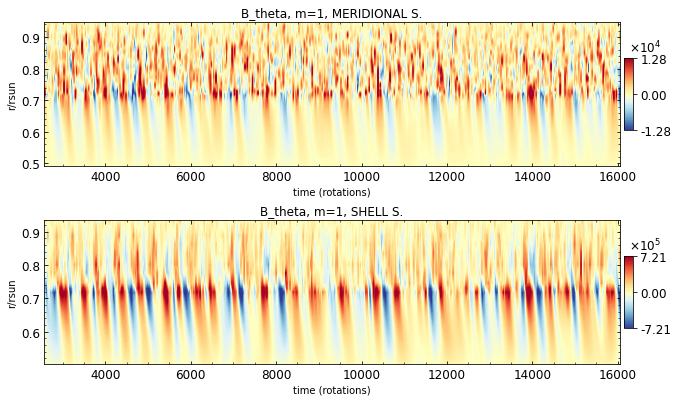

In [14]:
# let's plot the m = 1 B_theta, field from MERIDIONAL SLICES THEN SHELL SLICES
fig, axs, fpar = make_figure(nplots=2, ncol=1, sub_width_inches=8, sub_height_inches=2, margin_right_inches=3/4,\
                            margin_top_inches=1/4)
# mer slices
ax = axs[0, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('r/rsun')
ax.set_title('B_theta, m=1, MERIDIONAL S.')
ntot = 500
t_thin = thin_data(times, ntot)
field = thin_data(np.real(bt_m1), ntot)
plot_timey(field, t_thin, rr/rsun, fig, ax)

# shell slices
ax = axs[1, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('r/rsun')
ax.set_title('B_theta, m=1, SHELL S.')
ntot = 500
t_thin_ss = thin_data(times_ss, ntot)
field = thin_data(np.real(bt_m1_ss), ntot)
plot_timey(field, t_thin_ss, a.radius/rsun, fig, ax)
ax.set_ylim(np.min(a.radius/rsun), np.max(a.radius/rsun))

(0.5022630546091584, 0.9345350089027472)

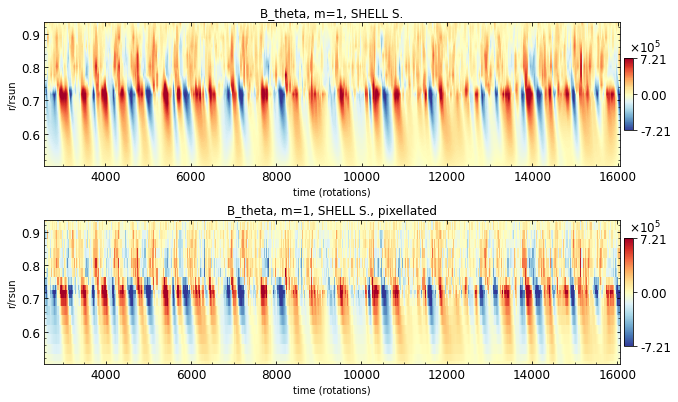

In [15]:
# let's plot the m = 1 B_theta, field from MERIDIONAL SLICES THEN SHELL SLICES
fig, axs, fpar = make_figure(nplots=2, ncol=1, sub_width_inches=8, sub_height_inches=2, margin_right_inches=3/4,\
                            margin_top_inches=1/4)
# shell slices
ax = axs[0, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('r/rsun')
ax.set_title('B_theta, m=1, SHELL S.')
ntot = 500
t_thin_ss = thin_data(times_ss, ntot)
field = thin_data(np.real(bt_m1_ss), ntot)
plot_timey(field, t_thin_ss, a.radius/rsun, fig, ax)
ax.set_ylim(np.min(a.radius/rsun), np.max(a.radius/rsun))

# shell slices
ax = axs[1, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('r/rsun')
ax.set_title('B_theta, m=1, SHELL S., pixellated')
ntot = 500
t_thin_ss = thin_data(times_ss, ntot)
field = thin_data(np.real(bt_m1_ss), ntot)
plot_timey(field, t_thin_ss, a.radius/rsun, fig, ax, pcolormesh=True)
ax.set_ylim(np.min(a.radius/rsun), np.max(a.radius/rsun))

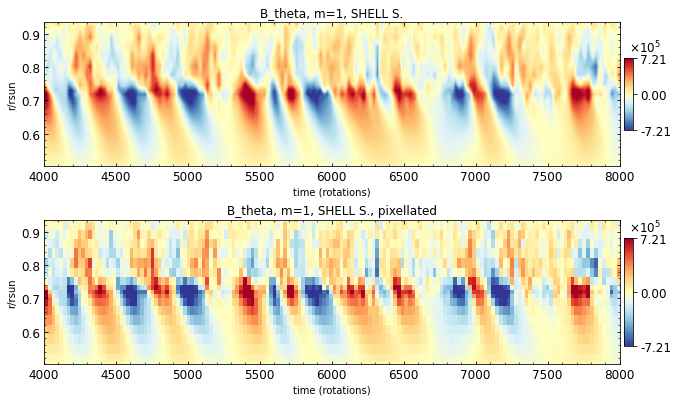

In [16]:
# try zooming in on last 4000 iters
fig, axs, fpar = make_figure(nplots=2, ncol=1, sub_width_inches=8, sub_height_inches=2, margin_right_inches=3/4,\
                            margin_top_inches=1/4)
# shell slices
ax = axs[0, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('r/rsun')
ax.set_title('B_theta, m=1, SHELL S.')
ntot = 500
t_thin_ss = thin_data(times_ss, ntot)
field = thin_data(np.real(bt_m1_ss), ntot)
plot_timey(field, t_thin_ss, a.radius/rsun, fig, ax)
ax.set_ylim(np.min(a.radius/rsun), np.max(a.radius/rsun))

# shell slices
ax = axs[1, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('r/rsun')
ax.set_title('B_theta, m=1, SHELL S., pixellated')
ntot = 500
t_thin_ss = thin_data(times_ss, ntot)
field = thin_data(np.real(bt_m1_ss), ntot)
plot_timey(field, t_thin_ss, a.radius/rsun, fig, ax, pcolormesh=True)
ax.set_ylim(np.min(a.radius/rsun), np.max(a.radius/rsun))

for ax in axs.flatten():
    ax.set_xlim(4e3, 8e3)

In [17]:
# well, I actually think the smooth one is OK

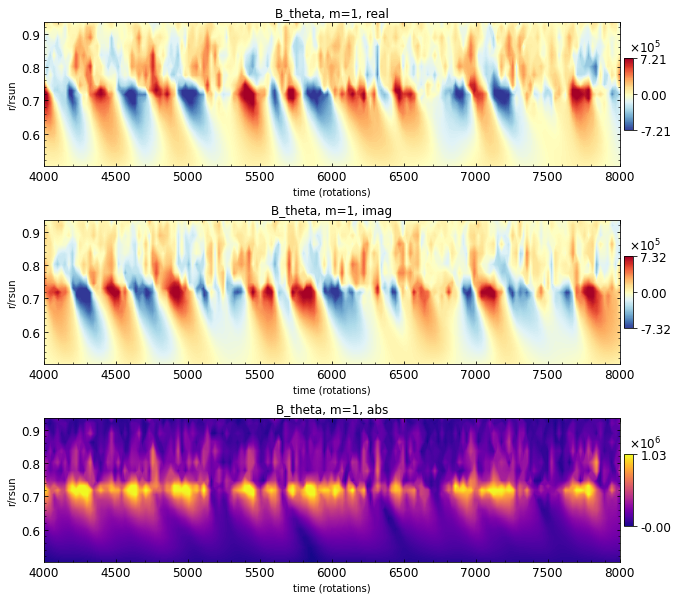

In [18]:
# let's try real, imag. and absolute magnitude
# try zooming in on last 4000 iters
fig, axs, fpar = make_figure(nplots=3, ncol=1, sub_width_inches=8,\
                             sub_height_inches=2, margin_right_inches=3/4,\
                            margin_top_inches=1/4)
# real
ax = axs[0, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('r/rsun')
ax.set_title('B_theta, m=1, real')
ntot = 500
t_thin_ss = thin_data(times_ss, ntot)
field = thin_data(np.real(bt_m1_ss), ntot)
plot_timey(field, t_thin_ss, a.radius/rsun, fig, ax)
ax.set_ylim(np.min(a.radius/rsun), np.max(a.radius/rsun))

# imag
ax = axs[1, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('r/rsun')
ax.set_title('B_theta, m=1, imag')
ntot = 500
t_thin_ss = thin_data(times_ss, ntot)
field = thin_data(np.imag(bt_m1_ss), ntot)
plot_timey(field, t_thin_ss, a.radius/rsun, fig, ax)
ax.set_ylim(np.min(a.radius/rsun), np.max(a.radius/rsun))

# abs
ax = axs[2, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('r/rsun')
ax.set_title('B_theta, m=1, abs')
ntot = 500
t_thin_ss = thin_data(times_ss, ntot)
field = thin_data(np.abs(bt_m1_ss), ntot)
plot_timey(field, t_thin_ss, a.radius/rsun, fig, ax, posdef=True)
ax.set_ylim(np.min(a.radius/rsun), np.max(a.radius/rsun))

for ax in axs.flatten():
    ax.set_xlim(4e3, 8e3)

In [34]:
# OK ready for the plot
# set figure dimensions
fig_width_inches = 7.25
margin_inches = 1./16.
margin_left_inches = 1/4
margin_bottom_inches = 1/4 # space for colorbar
margin_top_inches = 1/4

# two Mollweides, colorbars on bottom
moll_width_inches = (fig_width_inches - 3*margin_inches - margin_left_inches)/3
moll_height_inches = 0.5*moll_width_inches

# time radius dimensions
tr_height_inches = 1*moll_height_inches
tr_margin_left_inches = 1/2
tr_margin_right_inches = 5/8 # space for vertical colorbar
tr_margin_bottom_inches = 3/8

# Now get figure height, from top down
fig_height_inches = 2*(moll_height_inches + margin_bottom_inches + margin_top_inches) +\
    tr_height_inches + tr_margin_bottom_inches + margin_top_inches

# non D fig parameters
margin_x = margin_inches/fig_width_inches
margin_left = margin_left_inches/fig_width_inches
margin_y = margin_inches/fig_height_inches

#margin_left = margin_left_inches/fig_width_inches
margin_bottom = margin_bottom_inches/fig_height_inches
margin_top = margin_top_inches/fig_height_inches

moll_width = moll_width_inches/fig_width_inches
moll_height = moll_height_inches/fig_height_inches

tr_margin_right = tr_margin_right_inches/fig_width_inches
tr_margin_left = tr_margin_left_inches/fig_width_inches
tr_width = 1 - tr_margin_right - tr_margin_left
tr_height = tr_height_inches/fig_height_inches
tr_margin_bottom = tr_margin_bottom_inches/fig_height_inches

print(fig_width_inches, fig_height_inches)

7.25 5.03125


kw.nlevs =  128
kw.nlevs =  128
kw.nlevs =  128
kw.nlevs =  128
kw.nlevs =  128
kw.nlevs =  128


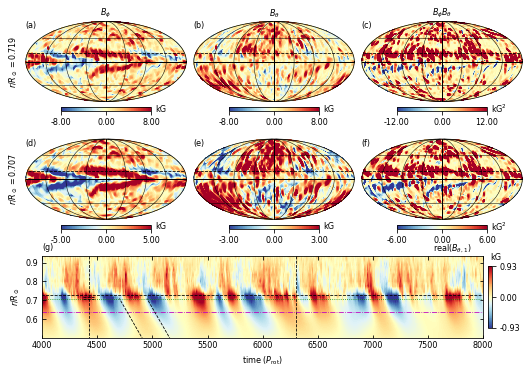

In [35]:
# reset my_contourf stuff
#my_contourf_kwargs_default = my_contourf_kwargs_default_old.copy()
# plot figure
#plt.close()
my_contourf_kwargs_default['allticksoff'] = True
my_contourf_kwargs_default['cbar_pos'] = 'bottom'

fig = plt.figure(figsize=(fig_width_inches, fig_height_inches))

ax1 = fig.add_axes((margin_left, 1 - margin_top - moll_height, moll_width, moll_height))
ax2 = fig.add_axes((margin_left + (moll_width+margin_x), 1 - margin_top - moll_height, moll_width, moll_height))
ax3 = fig.add_axes((margin_left, tr_margin_bottom + tr_height + margin_top + margin_bottom,\
                    moll_width, moll_height))
ax4 = fig.add_axes((margin_left + (moll_width+margin_x),\
                    tr_margin_bottom + tr_height + margin_top + margin_bottom, \
                    moll_width, moll_height))
ax5 = fig.add_axes((tr_margin_left, tr_margin_bottom, tr_width, tr_height))

# two more for product of field components
ax6 = fig.add_axes((margin_left + 2*(moll_width+margin_x), 1 - margin_top - moll_height, moll_width, moll_height))
ax7 = fig.add_axes((margin_left + 2*(moll_width+margin_x),\
                    tr_margin_bottom + tr_height + margin_top + margin_bottom, \
                    moll_width, moll_height))

# Do the Mollweides

# grid params
cost = a.costheta

# B phi, CZ
#units = r'$B_\phi$' + ' (T)'
units = 'kG'
ircz = 9
field = bp[:, :, ircz]/1e3
maxabs = 8
nlevs = 128 # make .pdf not too big

latvals = [-45, 0, 45]
#latvals = [lat0_grid]
lonvals = [-135, -90, -45, 0, 45, 90, 135]
#lonvals = [0]
plot_moll(field, cost, fig, ax1, units=units, nosci=True, linewidth=0.5, latvals=latvals, lonvals=lonvals,\
          cbar_fs=labelsize, cbar_thick=1/16, cbar_aspect=1/20, nlevelsfield=nlevs, minmax=(-maxabs, maxabs))

# B theta, CZ
#units = r'$B_\theta$' + ' (T)'

units = 'kG'
field = bt[:, :, ircz]/1.0e3
maxabs = 8
plot_moll(field, cost, fig, ax2, units=units, nosci=True, linewidth=0.5, latvals=latvals, lonvals=lonvals,\
          cbar_fs=labelsize, cbar_thick=1/16, cbar_aspect=1/20, nlevelsfield=nlevs, minmax=(-maxabs, maxabs))

# the product, CZ
units = r'$\rm{kG}^2$'
field = (bp*bt)[:, :, ircz]/1e6
maxabs = 12
nlevs = 128 # make .pdf not too big
plot_moll(field, cost, fig, ax6, units=units, nosci=True, linewidth=0.5, latvals=latvals, lonvals=lonvals,\
          cbar_fs=labelsize, cbar_thick=1/16, cbar_aspect=1/20, nlevelsfield=nlevs, minmax=(-maxabs, maxabs))

# B phi
#units = r'$B_\phi$' + ' (T)'
ir = 10
units = 'kG'
field = bp[:, :, ir]/1e3
maxabs = 5
nlevs = 128 # make .pdf not too big
plot_moll(field, cost, fig, ax3, units=units, nosci=True, linewidth=0.5, latvals=latvals, lonvals=lonvals,\
          cbar_fs=labelsize, cbar_thick=1/16, cbar_aspect=1/20, nlevelsfield=nlevs, minmax=(-maxabs, maxabs))

# B theta
#units = r'$B_\theta$' + ' (T)'
units = 'kG'
field = bt[:, :, ir]/1.0e3
maxabs = 3
plot_moll(field, cost, fig, ax4, units=units, nosci=True, linewidth=0.5, latvals=latvals, lonvals=lonvals,\
          cbar_fs=labelsize, cbar_thick=1/16, cbar_aspect=1/20, nlevelsfield=nlevs, minmax=(-maxabs, maxabs))

# the product
units = r'$\rm{kG}^2$'
field = (bp*bt)[:, :, ir]/1e6
maxabs = 6
nlevs = 128 # make .pdf not too big
plot_moll(field, cost, fig, ax7, units=units, nosci=True, linewidth=0.5, latvals=latvals, lonvals=lonvals,\
          cbar_fs=labelsize, cbar_thick=1/16, cbar_aspect=1/20, nlevelsfield=nlevs, minmax=(-maxabs, maxabs))


# add a dashed latitude for lat = 15
xs, ys = mollweide_transform(a.costheta)

for ax in [ax1, ax2, ax3, ax4, ax6, ax7]:
    ax.plot(xs[:, ilat0_grid], ys[:, ilat0_grid], 'k--', linewidth=0.8)

# make time radius plot
my_contourf_kwargs_default['allticksoff'] = False
my_contourf_kwargs_default['cbar_pos'] = 'right'
field = np.real(bt_m1_ss)/1e3/nphi # convert to T, and normalize by the Fourier transform factor
plot_timey(field, times_ss, a.radius/rsun, fig, ax5, cbar_fs=labelsize, cbar_thick=1/16,\
           cbar_aspect=1/20, fontsize=labelsize, nosci=True, units='kG',\
          yvals=rvals_M,linestyles2=linestyles, linecolors2=linecolors,\
          timevals=[4421.6, 6299.1], linewidths1=0.8, linewidths2=0.8, linestyles1='--')
ax5.set_xlim(4e3, 8e3)
ax5.set_ylim(np.min(a.radius/rsun), np.max(a.radius/rsun))


# make ticks where the shell slice levels are
tcenter = 4422.
twidth = 100.
trange = np.linspace(tcenter - twidth/2, tcenter + twidth/2, 100)
ax5.plot(trange, a.radius[ircz]/rsun + np.zeros(100), 'k--', linewidth=0.8)
ax5.plot(trange, a.radius[ir]/rsun + np.zeros(100), 'k--', linewidth=0.8)

# label the axes
ax5.set_xlabel('time ' + r'$(P_{\rm{rot}})$', fontsize=labelsize)
ax5.set_ylabel(r'$r/R_\odot$', fontsize=labelsize)

# diffusion speed
eq = get_eq(dirname)
irov = np.argmin(np.abs(rr/rsun - r_ovshoot))
rmin = np.min(rr)/rsun
irmid = np.argmin(np.abs(rr/rsun - (rmin + 0.5*(r_ovshoot - rmin))))
eta0 = eq.eta[irov]
pdyn = 500*prot
omdyn = 2*np.pi/pdyn
diff_speed = np.sqrt(2*eta0*omdyn)
rrange = np.linspace(np.min(rr)/rsun, r_ovshoot, 100)

for tchoose in [4700., 4950.]:
    trange = tchoose + (r_ovshoot-rrange)*rsun/diff_speed/prot
    ax5.plot(trange, rrange, 'k--', linewidth=0.8)

    
# remove minor ticks from TR plot
plt.sca(ax5)
plt.minorticks_off()
plt.tick_params(top=True, right=True, direction='in', which='both', labelsize=labelsize)
    
# put A, B, C labels
#line_height = 3/16/fig_height_inches

#fig.text(margin_left, 1 - margin_top + line_height, '(a)', ha='left', va='top',\
#         fontsize=labelsize)
#fig.text(margin_left + (moll_width+margin_x), 1 - margin_top + line_height, '(b)', ha='left', va='top',\
#         fontsize=labelsize)
#fig.text(margin_left + 2*(moll_width+margin_x), 1 - margin_top + line_height, '(c)', ha='left', va='top',\
#         fontsize=labelsize)

#fig.text(margin_left, 1 - 2*margin_top - moll_height - margin_bottom + line_height, '(d)',\
#         ha='left', va='top', fontsize=labelsize)
#fig.text(margin_left + (moll_width+margin_x),\
#         1 - 2*margin_top - moll_height - margin_bottom + line_height, '(e)',\
#         ha='left', va='top', fontsize=labelsize)
#fig.text(margin_left + 2*(moll_width+margin_x),\
#         1 - 2*margin_top - moll_height - margin_bottom + line_height, '(f)',\
#         ha='left', va='top', fontsize=labelsize)

line_height = 3/16/fig_height_inches

letter_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
count = 0
for ax in [ax1, ax2, ax6, ax3, ax4, ax7]:
    ax.text(-2, 1, letter_labels[count], ha='left', va='top', fontsize=labelsize)
    count += 1


fig.text(tr_margin_left, tr_margin_bottom + tr_height + line_height, '(g)', ha='left', va='top',\
         fontsize=labelsize)


# label B_phi and B_theta and product
buffspace = ' '*10
#fig.text(margin_left + moll_width, 1 - margin_top + line_height,\
#         r'$B_\phi,\ r/R_\odot=%.3f$' %(a.radius[ircz]/rsun) + buffspace,\
#         ha='right', va='top', fontsize=labelsize)
#fig.text(margin_left + 2*moll_width + margin_x, 1 - margin_top + line_height,\
#         r'$B_\theta,\ r/R_\odot=%.3f$' %(a.radius[ircz]/rsun) + buffspace,\
#         ha='right', va='top', fontsize=labelsize)
#fig.text(margin_left + 3*moll_width + 2*margin_x, 1 - margin_top + line_height,\
#         r'$B_\phi B_\theta,\ r/R_\odot=%.3f$' %(a.radius[ircz]/rsun) + buffspace,\
#         ha='right', va='top', fontsize=labelsize)

fig.text(margin_left + 0.5*moll_width, 1 - margin_top + line_height,\
         r'$B_\phi$',\
         ha='center', va='top', fontsize=labelsize)
fig.text(margin_left + 1.5*moll_width + margin_x, 1 - margin_top + line_height,\
         r'$B_\theta$',\
         ha='center', va='top', fontsize=labelsize)
fig.text(margin_left + 2.5*moll_width + 2*margin_x, 1 - margin_top + line_height,\
         r'$B_\phi B_\theta$',\
         ha='center', va='top', fontsize=labelsize)

#fig.text(margin_left + moll_width,\
#         1 - 2*margin_top - moll_height - margin_bottom + line_height,\
#         r'$B_\phi,\ r/R_\odot=%.3f$' %(a.radius[ir]/rsun) + buffspace,\
#         ha='right', va='top', fontsize=labelsize)
#fig.text(margin_left + 2*moll_width + margin_x,\
#         1 - 2*margin_top - moll_height - margin_bottom + line_height,\
#         r'$B_\theta,\ r/R_\odot=%.3f$' %(a.radius[ir]/rsun) + buffspace,\
#         ha='right', va='top', fontsize=labelsize)
#fig.text(margin_left + 3*moll_width + 2*margin_x,\
#         1 - 2*margin_top - moll_height - margin_bottom + line_height,\
#         r'$B_\phi B_\theta,\ r/R_\odot=%.3f$' %(a.radius[ir]/rsun) + buffspace,\
#         ha='right', va='top', fontsize=labelsize)
    
# label the depths at left
fig.text(margin_left - margin_x, 1 - margin_top - 0.5*moll_height,
         r'$r/R_\odot=%.3f$' %(a.radius[ircz]/rsun),\
         ha='right', va='center', rotation=90, fontsize=1.0*labelsize)
fig.text(margin_left - margin_x, 1 - 2*margin_top - 1.5*moll_height - margin_bottom,
         r'$r/R_\odot=%.3f$' %(a.radius[ir]/rsun),\
         ha='right', va='center', rotation=90, fontsize=1.0*labelsize)

# label the time rad
fig.text(tr_margin_left + tr_width, tr_margin_bottom + tr_height + line_height,\
         r'${\rm{real}}(B_{\theta,1})$' + 5*' ', ha='right', va='top',\
         fontweight='bold', fontsize=labelsize)

plt.savefig('images/mollB_and_timerad.png', dpi=300)

In [ ]:
#print("t1 = ", a1.time[0]/time_unit)
print("t = ", a.time[0]/time_unit)
print("r/rsun = ", a.radius[ir]/rsun)
print("r/rsun = ", a.radius[ircz]/rsun)

In [ ]:
rr[irmid]/rsun

In [ ]:
eta0

In [ ]:
np.shape(xs)

In [ ]:
ys[:, ilat0_grid]